In [37]:
from matplotlib import pyplot as plt
import numpy as np
import scipy.stats
from scipy.stats import t
from scipy.stats import chi2
import math

In [38]:
def make_graph(min,max):
    # Create the data set
    mean_list = []
    x_list = []
    for x in range(len(min)):
        mean = ((min[x]+max[x])/2)
        mean_list.append(mean)
        x_list.append(x)
        plt.vlines(x, min[x],max[x])
        plt.scatter(x, mean)
    plt.ylabel('Konfidents Intervall')
    plt.plot(x_list, mean_list, 'b', linestyle="-")
    # Plot the confidence interval
    plt.show()

In [39]:
def find_k(alpha):
    for x in range(-4000,4000):
        answer = normal_dist(x/1000, False)
        if answer == alpha:
            #print(f'G(z≤k) = {x/10000}')
            return x/1000
        if answer-0.0001 == alpha:
            #print(f'G(z≤k) = {x/10000}')
            return x/1000

In [40]:
def find_length(alpha,sigma,limit):
    z = find_k(alpha)
    return math.pow(((2*z*sigma)/limit),2)

In [41]:
def normal_dist(my, steps):
    # KUMULATIV STANDARDNORMALFORDELING N(1,0)
    answer = float(f'{scipy.stats.norm.cdf(my,0):.4f}')
    # Get the value for G(z) where N(0,1)
    if steps:
        print(f'G({std}) = P(z<{my}) = {answer:.4f} - {round(answer*100, 2)}%')
        print(f'G({std}) = P(z>{my}) = {1-answer:.4f} - {round((1-answer)*100, 2)}%')
    return answer

In [42]:
def find_ki(n,std,alpha,mean,pow_numbers,excepted):
    alpha_2 = alpha
    if std == None:
        t = find_t(alpha,n,pow_numbers,mean,excepted)
        s = find_s(pow_numbers,mean)
        left = mean - (t*(s/math.sqrt(n)))
        right = mean + (t*(s/math.sqrt(n)))
        print(f'Estimated std: {s}')
    else:
        alpha = find_k(alpha)
        antstd = std/(math.sqrt(n))
        left = mean - (alpha*antstd)
        right = mean + (alpha*antstd)

    print(f'{alpha_2}% KI for µ: [{left:.4f}, {right:.4f}]')

In [43]:
def find_s(pow_numbers,mean):
    emp = 0
    for num in pow_numbers:
        emp += pow((num-mean),2) 
    s = math.sqrt(emp/((len(pow_numbers)-1)))
    return s


In [44]:
def find_t(alpha,n,pow_numbers,mean,excepted):
    s = find_s(pow_numbers,mean)
    #t_v = round(t.ppf(alpha,n-1),4)
    value = ((mean-excepted)/(s/math.sqrt(n)))
    return value

In [45]:
# Find length
sigma = 0.9
alpha = 0.95
limit = 0.5
find_length(alpha,sigma,limit)

35.07008400000001

In [46]:
# KONFIDENTSINTERVALL Normalfordelt
# H0 : μ ≥excpected mot H1 : μ < 311
pow_numbers = [120,132,150]
n = 39
x = 127.33
excepted = 0
std = 17.02
mean = x/n
alpha = 0.02

if len(pow_numbers)>1:
    for number in pow_numbers:
        mean += number
    n = len(pow_numbers)
    mean = mean/n
    sorted_pow_numbers = sorted(pow_numbers)
    median = sorted_pow_numbers[round(n/2)]
    nedre = round(n*(1/4))
    ovre = round(n*(3/4))

    nedre_liste = []
    ovre_liste = []
    print(f'Median: {median}  -  Mean: {mean}')
    for x in range(0,nedre+1):
        nedre_liste.append(sorted_pow_numbers[x])
    for x in range(ovre-1,len(pow_numbers)):
        ovre_liste.append(sorted_pow_numbers[x])
    print(f'Nedrekvartil: {nedre_liste}\nØvrekvartil: {ovre_liste}')
    t_value = find_t(alpha,n,pow_numbers,mean,excepted)
    print('testobservator T:',t_value)
    
find_ki(n,std,alpha,mean,pow_numbers,excepted)


Median: 150  -  Mean: 135.0882905982906
Nedrekvartil: [120, 132]
Øvrekvartil: [132, 150]
testobservator T: 15.435669371055296
0.02% KI for µ: [155.2719, 114.9047]


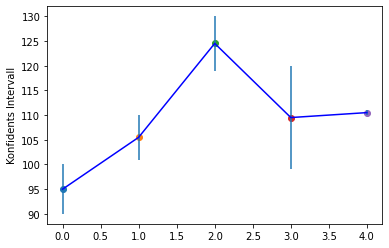

In [47]:
min = [100,
       110,
       130,
       120,
       110
]
max = [90,
       101,
       119,
       99,
       111
]

make_graph(min,max)

In [48]:
def var_and_std_KI(n,s,alpha):
    alpha_up = 1-(1 - alpha/100)/2
    alpha_down = (1 - alpha/100)/2

    xhi_up = chi2.ppf(alpha_down, n)
    xhi_down = chi2.ppf(alpha_up, n)

    lower = ((n-1)*s)/xhi_down
    upper = ((n-1)*s)/xhi_up
    print(f'95% KI for σ2: [{lower:.4f},{upper:.4f}]')
    print(f'95% KI for σ: [{math.sqrt(lower):.4f},{math.sqrt(upper):.4f}]')

In [49]:
# KI for Variance σ2 and Standard deviation σ
n = 215
s = 14.83
alpha = 95

var_and_std_KI(n,s,alpha)

95% KI for σ2: [12.3246,18.0029]
95% KI for σ: [3.5106,4.2430]
